In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "/home/asavari/Downloads/A,B,CNNS_with_Tim/veggie_heap_training"
test_dir = "/home/asavari/Downloads/A,B,CNNS_with_Tim/veggie_heap_testing"

In [4]:
img_size = (150, 150)
batch_size = 32

In [5]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7872 images belonging to 12 classes.
Found 1963 images belonging to 12 classes.


In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

/home/asavari/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-28 01:39:08.974277: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

/home/asavari/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 66s 264ms/step - accuracy: 0.5896 - loss: 1.2695 - val_accuracy: 0.8808 - val_loss: 0.3755
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 61s 249ms/step - accuracy: 0.9173 - loss: 0.2535 - val_accuracy: 0.9536 - val_loss: 0.1564
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 62s 251ms/step - accuracy: 0.9595 - loss: 0.1176 - val_accuracy: 0.9399 - val_loss: 0.2039
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 62s 253ms/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9562 - val_loss: 0.1783
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 64s 258ms/step - accuracy: 0.9833 - loss: 0.0471 - val_accuracy: 0.9613 - val_loss: 0.1709
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 65s 265ms/step - accuracy: 0.9841 - loss: 0.0482 - val_accuracy: 0.9496 - val_loss: 0.1934
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 65s 262ms/step - accuracy: 0.9892 - loss: 0.0275 - val_accuracy: 0.9547 - val_loss: 0.1921
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.9931 - loss: 0

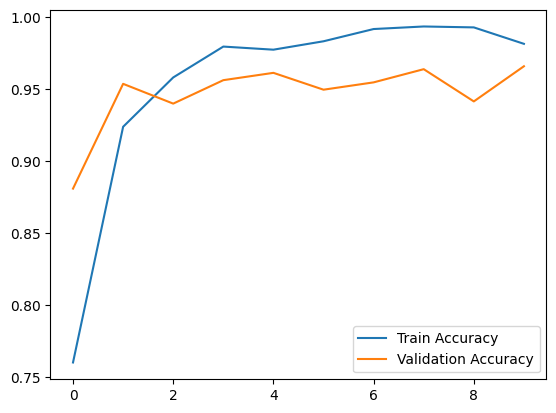

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2424 images belonging to 12 classes.


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [12]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

/home/asavari/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step


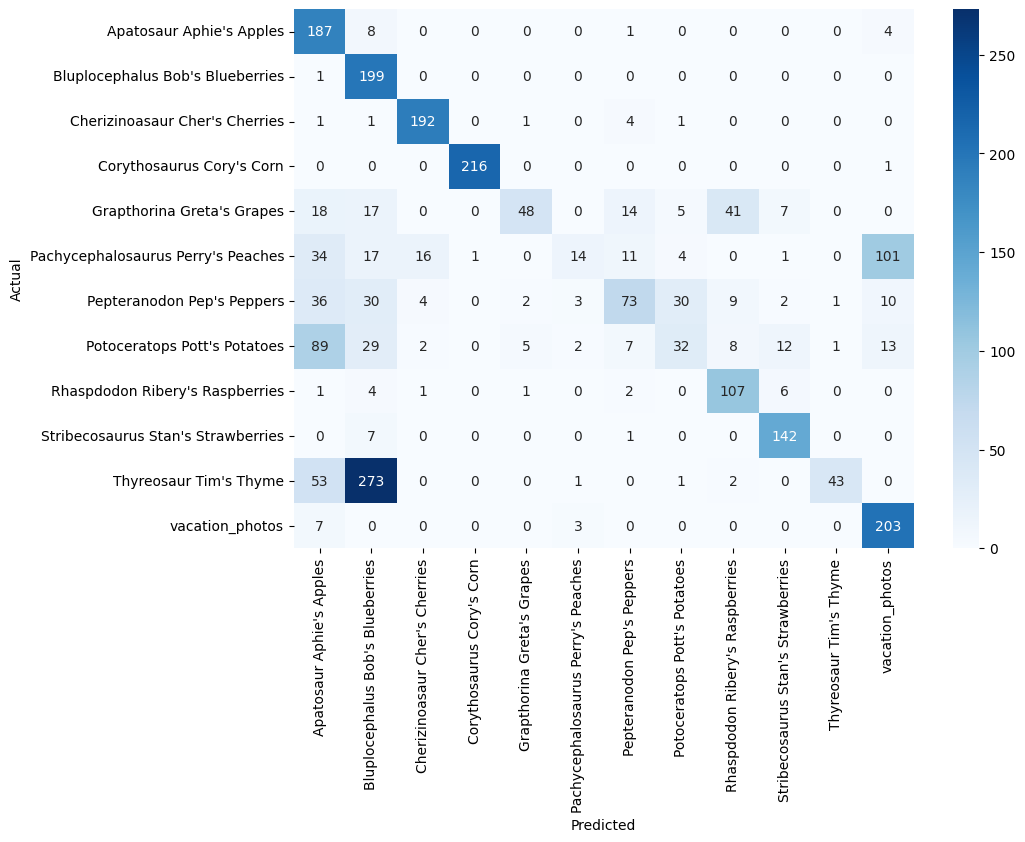

In [13]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.44      0.94      0.60       200
  Bluplocephalus Bob's Blueberries       0.34      0.99      0.51       200
    Cherizinoasaur Cher's Cherries       0.89      0.96      0.93       200
         Corythosaurus Cory's Corn       1.00      1.00      1.00       217
        Grapthorina Greta's Grapes       0.84      0.32      0.46       150
Pachycephalosaurus Perry's Peaches       0.61      0.07      0.13       199
        Pepteranodon Pep's Peppers       0.65      0.36      0.47       200
      Potoceratops Pott's Potatoes       0.44      0.16      0.23       200
   Rhaspdodon Ribery's Raspberries       0.64      0.88      0.74       122
Stribecosaurus Stan's Strawberries       0.84      0.95      0.89       150
            Thyreosaur Tim's Thyme       0.96      0.12      0.21       373
                   vacation_photos       0.61      0.95      0.74       213

          